# Importing libraries

In [76]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Importing data

In [77]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Imm_Ach 6 DA Project 6\Snow Crab Ach 6'

In [78]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Imm_Ach 6 DA Project 6\\Snow Crab Ach 6'

In [79]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Filtered Snow Crab.csv'), index_col = False)

In [80]:
df.shape

(16450, 12)

In [81]:
df.head()

,Unnamed: 0,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile
0,0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356.0
1,1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691.0
2,3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882.0
3,4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258.0
4,5,147033,56.66667,-171.33333,1975,snow crab,male,119,5.7,2.5,91,6492.0


# Subsetting, wrangling and cleaning of the data

In [82]:
# Subsetting

df_time_analysis = df[['year', 'catch number/square nautical mile']]

In [83]:
df_time_analysis.shape

(16450, 2)

In [84]:
df_time_analysis.head()

,year,catch number/square nautical mile
0,1975,40356.0
1,1975,68691.0
2,1975,7882.0
3,1975,11258.0
4,1975,6492.0


In [85]:
# Aggregating

metric_col = 'catch number/square nautical mile'
df_time_analysis2 = (df_time_analysis.groupby('year', as_index=False)[metric_col].mean().rename(columns={metric_col: 'metric'}))

In [86]:
df_time_analysis2.shape

(44, 2)

In [87]:
df_time_analysis2.head()

,year,metric
0,1975,14452.544828
1,1976,14673.836257
2,1977,24749.629630
3,1978,13853.693103
4,1979,11041.139860


In [88]:
# Checking for missing values

df_time_analysis2.isnull().sum()

year      0
metric    0
dtype: int64

In [89]:
# Checking for duplicates

dups = df_time_analysis2.duplicated()
dups.sum()

0

In [90]:
df_time_analysis2[['year', 'metric']].dtypes

year        int64
metric    float64
dtype: object

# Time-series analysis: decomposition

In [91]:
# Preparing the dataframe - setting datetime as the index

df_time_analysis2['datetime'] = pd.to_datetime(df_time_analysis2['year'].astype(int), format='%Y')
df_time_analysis2 = (df_time_analysis2.set_index('datetime').asfreq('YS').drop(columns=['year']))

In [92]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time_analysis2, model='additive')

# Plotting a line chart & the components of the data

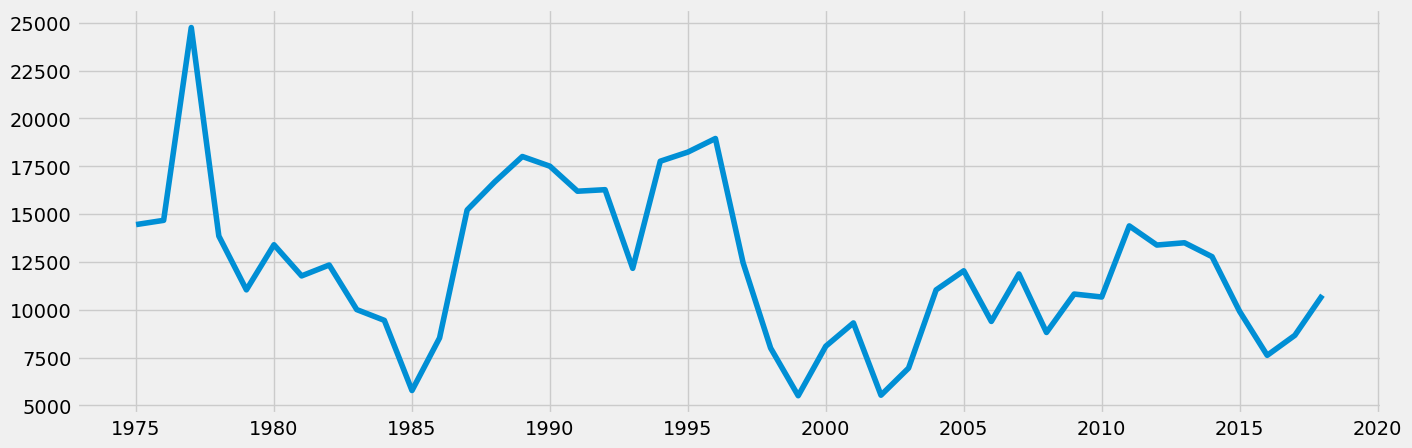

In [99]:
# Plotting the data set

ta = plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time_analysis2)

In [100]:
ta.figure
ta.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'time analysis.png'))

In [94]:
from pylab import rcParams

# Defining a fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

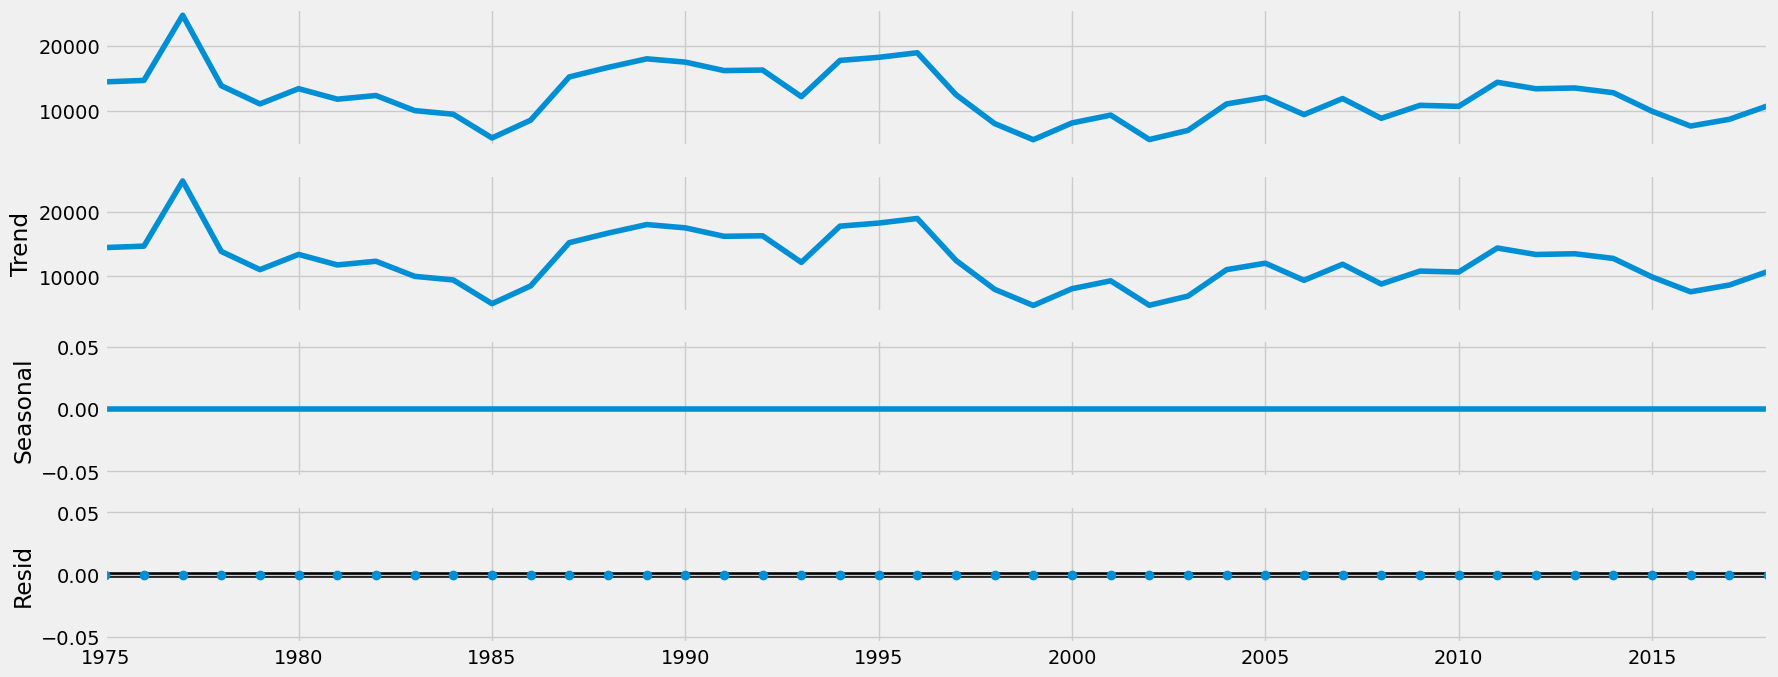

In [95]:
# Plotting the separate components

decomposition.plot()
plt.show()

# There's little noise in the data, hence, level and trend charts appearing the same. Moreover, there's no saisonality.

# Testing for stationarity

In [97]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_time_analysis2['metric'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.102201
p-value                         0.026391
Number of Lags Used             0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


# Result: The data is stationary, therefore the null-hypothesis can be rejected.
# The p-value is < 0.05 or 5% and the Test Statistic < than the 5% & 10% Critical Value.

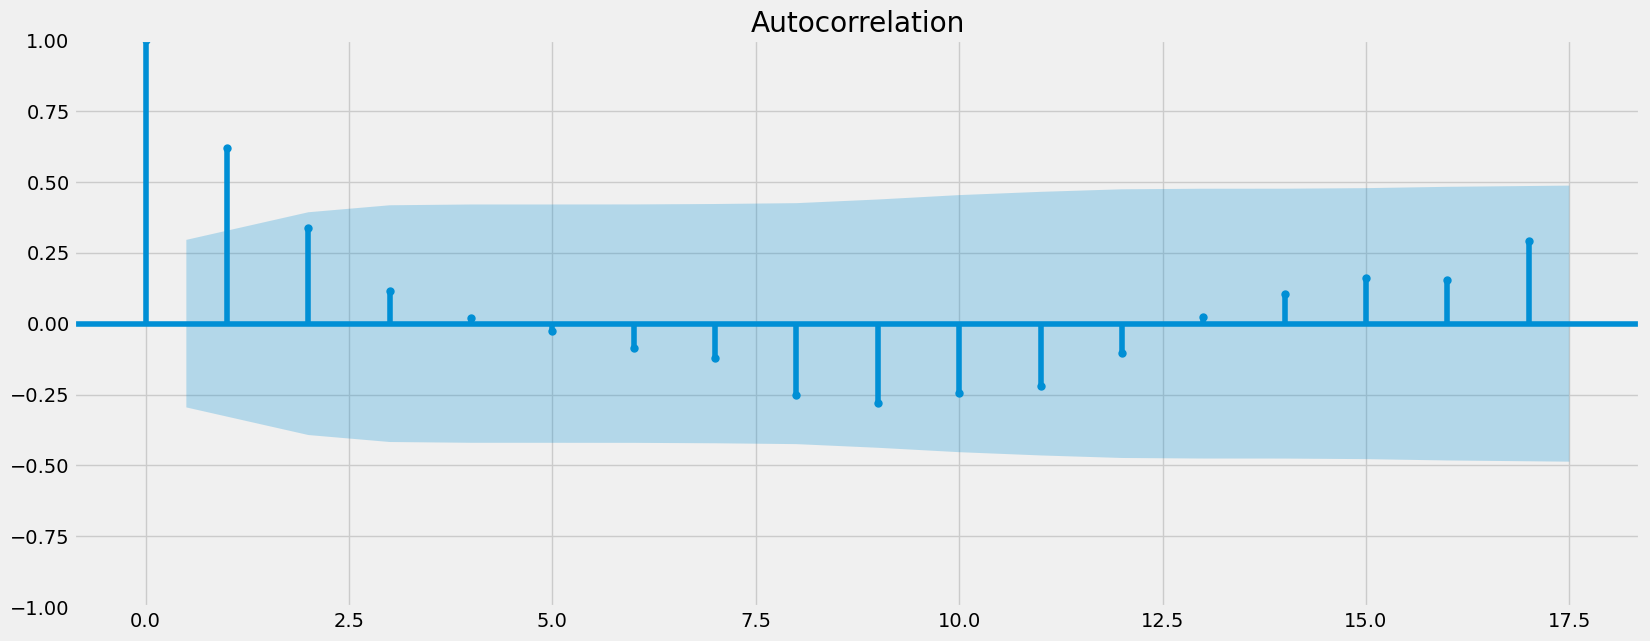

In [98]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_time_analysis2)
plt.show()

# As there's just two significant lags (vertical lines above the confidence interval), the data can be considered stationary, as already stated.